In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

In [183]:
# parameters of the true (unknown) demand model
true_slop = 30
true_intercept = -5

In [184]:
eta = 0.999
num_episodes = 100000
stock = 40
prices = [1.99, 2.49, 2.99, 3.49, 3.99, 4.49]
horizon_steps = 20
initial_price = 5
lambda_ = 0.2

In [185]:
def retrieve_linear_demand(a, t): 
    demand = true_slop + true_intercept * prices[a] +0.1*math.exp(t/4)
    return np.random.poisson(demand, 1)[0]

In [186]:
Q = np.zeros((stock+1,horizon_steps, len(prices)),dtype=float)
num_visited = np.zeros((stock+1,horizon_steps,len(prices)), dtype=float)

Average revenue Normal: 129.66816


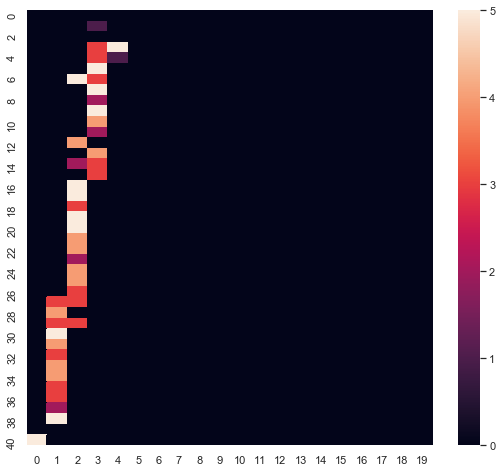

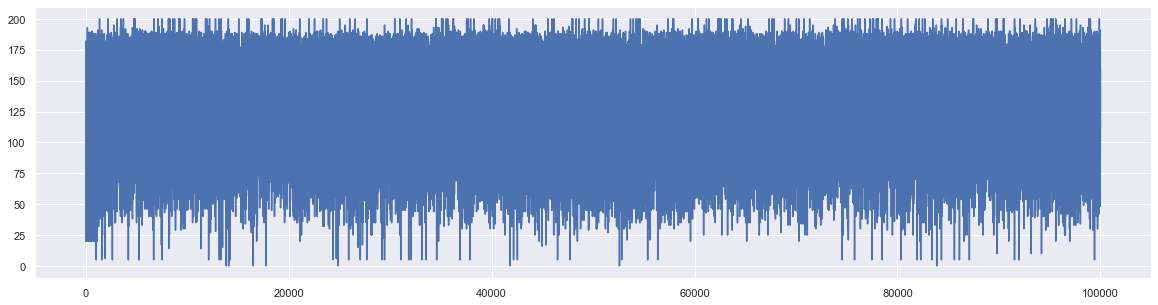

In [191]:
rList = []
dList = []
for k in range(num_episodes):
    x = stock
    t = 0
    a = initial_price
    r_acum = 0
    d_acum = 0
    for t in range(horizon_steps-1):
        observed_demand = retrieve_linear_demand(a, t)
        x_ = x - observed_demand
        t_ = t + 1
        if (x_ < 0):
            x_ = 0
            observed_demand = x
        r = observed_demand * a
        r_acum = r_acum + r
        d_acum = d_acum + observed_demand
        if np.random.uniform(0, 1) <= (1/(k+1)):
            a_ = np.random.choice(len(prices))
        else:
            a_ = np.argmax(Q[x_,t_,:])
        num_visited[x][t][a] = num_visited[x][t][a] + 1
        a_max = np.argmax(Q[x_,t_,:])
        delta = r + eta * Q[x_][t_][a_max] - Q[x][t][a]
        Q[x][t][a] = Q[x][t][a] + (1 / (num_visited[x][t][a] + 1)) * delta
        x = x_
        a = a_
    rList.append(r_acum)
    dList.append(d_acum)
    
print("Average revenue Normal: {}".format(sum(rList)/len(rList)))

A_s = np.zeros((stock+1, horizon_steps),dtype=int)
for horizon in range(horizon_steps):
    for state in range(stock+1):
        A_s[state][horizon] = np.argmax(Q[state,horizon,:])
        
# Here we create a figure instance, and two subplots
fig = plt.figure(figsize=(20,8))
ax1 = plt.subplot2grid((1,2), (0,0))

sns.heatmap(A_s, ax=ax1)

# Here we create a figure instance, and two subplots
fig = plt.figure(figsize=(20,5))
plt.plot(rList)